# Problem 2, 5300 Final: Gravitational Orbits in Cartesian Coordinates
## Author: Aidan Snyder, 4/28/23

The goal of this notebook is to complete the second problem of the Physics 5300 Spring 2023 Final Problem Set, which is to solve the two-body problem for gravitational attraction in Cartesian coordinates. 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100.
# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

In [3]:
class GravOrbit():
    '''
    Utilizes Lagrange's equations in order to solve for the EOM's for 2 orbiting bodies.
    
    Parameters:
    m1: mass of object 1
    m2: mass of object 2
    G: universal gravitational constant
    
    Methods:
    dz_dt(t,z)
        Returns RHS of the differential equation for vector z
    '''
    
    def __init__(self, m1 = 1., m2 = 1., G = 1.):
        self.m1 = m1
        self.m2 = m2
        self.G = G
    
    def dz_dt(self, t, z):
        '''
        For our case, vector z looks like this: 
        z[0] = x_1(t), z[1] = x_1_dot(t), z[2] = y_1(t), z[3] = y_1_dot(t)
        z[4] = x_2(t), z[5] = x_2_dot(t), z[6] = y_2(t), z[7] = y_2_dot(t)
        '''
        r_12 = np.sqrt((z[0] - z[4])**2 + (z[2] - z[6])**2)
        return [z[1], self.G * self.m2 * (z[4]-z[0]) / r_12**3., \
               z[3], self.G * self.m2 * (z[6]-z[2]) / r_12**3., \
               z[5], -self.G * self.m1 * (z[4]-z[0]) / r_12**3., \
               z[7], -self.G * self.m1 * (z[6]-z[2]) / r_12**3.]
    
    def solve_ode(self, t_pts, z_0,
                 abserr=1.0e-8, relerr=1.0e-8):
        solution = solve_ivp(self.dz_dt, (t_pts[0],t_pts[-1]),z_0,t_eval=t_pts,
                            method='RK45',atol=abserr,rtol=relerr)
        x_1,x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = solution.y
        return x_1,x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot
    

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

### Plotting

In [53]:
orbit_labels = (r'$x$', r'$y$')

t_start = 0.
t_end = 10.
delta_t = 0.0001

t_pts = np.arange(t_start, t_end + delta_t, delta_t)

<bound method Figure.tight_layout of <Figure size 500x500 with 1 Axes>>

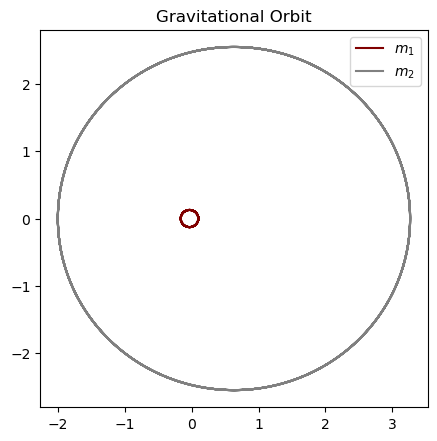

In [54]:
G = 20. 
m1 = 20.
m2 = 1.

orbit1 = GravOrbit(m1,m2,G)

x_1_0, x_1_dot_0 = 0.1, 0. 
y_1_0, y_1_dot_0 = 0., 0.75 
x_2_0, x_2_dot_0 = -(m1/m2) * x_1_0, -(m1/m2) * x_1_dot_0
y_2_0, y_2_dot_0 = -(m1/m2) * y_1_0, -(m1/m2) * y_1_dot_0

z_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0, x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]
x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = orbit1.solve_ode(t_pts, z_0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color = 'maroon', label=r'$m_1$')
ax.plot(x_2, y_2, color = 'gray', label=r'$m_2$')
ax.set_title('Gravitational Orbit')
ax.legend()

fig.tight_layout
#fig.savefig('.png', bbox_inches='tight')

<bound method Figure.tight_layout of <Figure size 500x500 with 1 Axes>>

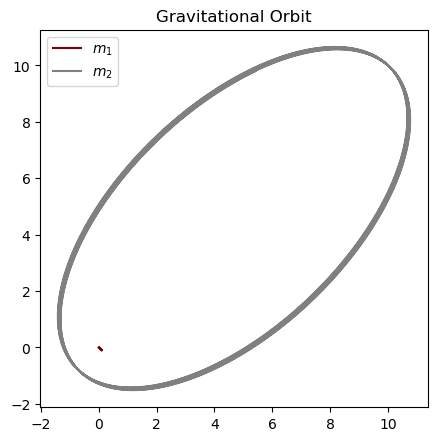

In [55]:
G = 20. 
m1 = 1000.
m2 = 1.

orbit1 = GravOrbit(m1,m2,G)

x_1_0, x_1_dot_0 = 0. , 0. 
y_1_0, y_1_dot_0 = 0., 0.
x_2_0, x_2_dot_0 = 10., 10.
y_2_0, y_2_dot_0 = 10., -10.

z_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0, x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]
x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = orbit1.solve_ode(t_pts, z_0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
ax.plot(x_1, y_1, color = 'maroon', label=r'$m_1$')
ax.plot(x_2, y_2, color = 'gray', label=r'$m_2$')
ax.set_title('Gravitational Orbit')
ax.legend()

fig.tight_layout
#fig.savefig('.png', bbox_inches='tight')